In [16]:
import numpy as np
import numpy.linalg as lin
import time
import matplotlib.pyplot as plt
import cvxpy as cp

# Задача: найти минимум логистический функции 


Функция принимает на вход следующие аргументы:

X: матрица признаков размерности (m, n), где m - количество объектов, а n - количество признаков объекта

y: вектор-столбец целевых переменных размерности (m, 1)

$\theta$: вектор-столбец  размерности (n, 1) [$\theta$[i] - целевая переменная X[i] объекта]

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
alpha = 0.1 
lamda = 0.1
iterations = 1000

# gradient descent algorithm
def gradient_descent(X, y, theta):
    m = len(y)
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        grad = (1 / m) * X.T.dot(h - y) + (lamda / m) * theta
        theta -= alpha * grad
    return theta


# Newton's method algorithm
def newtons_method(X, y, theta):
    m = len(y)
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        grad = (1 / m) * X.T.dot(h - y) + (lamda / m) * theta
        H = (1 / m) * X.T.dot(np.diag(h * (1 - h)).dot(X)) + (lamda / m) * np.eye(theta.shape[0])
        theta -= np.linalg.inv(H).dot(grad)
    return theta

для размерностей $n \in \{10, 20, \ldots, 100\}$ сгенерируем матрицы объектов-признаков $X$ и вектор целевых переменных $Y$

In [10]:
def generate_dataset(n):
    X = np.random.rand(50, n)
    Y = np.random.randint(2, size=50)
    return X, Y

In [11]:
# measure algorithm running time
def measure_time_theta(algorithm, X, y, theta):
    start_time = time.time()
    theta2 = algorithm(X, y, theta)
    end_time = time.time()
    return end_time - start_time, theta2

In [13]:
# compare algorithms on different dataset sizes
results_gd_theta = []
results_nt_theta = []
results = []
for n in range(10, 101, 10):
    X, y = generate_dataset(n)
    X = np.insert(X, 0, 1, axis=1)
    theta = np.zeros(n + 1)
    gd_time, theta_gd = measure_time_theta(gradient_descent, X, y, theta,)
    nt_time, theta_nt = measure_time_theta(newtons_method, X, y, theta)
    results_gd_theta.append(theta_gd)
    results_nt_theta.append(theta_nt)
    results.append((n, gd_time, nt_time))

При размерности 10 коэффициенты, вычисляемые градиентным спуском,: [-0.01366375  0.37458002  0.28053555 -0.07933777 -0.35778176 -0.47949885
 -0.09449163  1.30589453  0.14499188  0.1013735  -0.81711327]
Методом Ньютона: [-0.01366375  0.37458002  0.28053555 -0.07933777 -0.35778176 -0.47949885
 -0.09449163  1.30589453  0.14499188  0.1013735  -0.81711327]
---------------------------------------------------------------------------------------------------------------------------
При размерности 20 коэффициенты, вычисляемые градиентным спуском,: [ 1.42630373 -1.0178552   2.20537888  0.9569096  -2.00776284  0.55728206
 -0.35933132 -1.04225523 -0.81400075 -0.17502489 -1.33724174  0.91601213
 -1.32376731 -3.89085211  0.45043475  1.62994928  1.35822982  1.24562616
  1.12008961 -1.18894848 -0.37615122]
Методом Ньютона: [ 1.42630373 -1.0178552   2.20537888  0.9569096  -2.00776284  0.55728206
 -0.35933132 -1.04225523 -0.81400075 -0.17502489 -1.33724174  0.91601213
 -1.32376731 -3.89085211  0.4504347

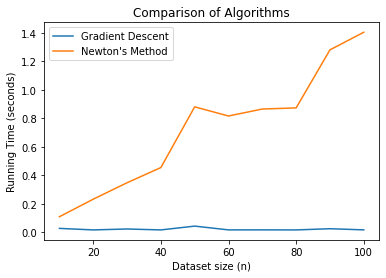

In [14]:
for i, n in zip(range(10), range(10, 101, 10)):
    print(
        f'При размерности {n} коэффициенты, вычисляемые градиентным спуском,: {results_gd_theta[i]}\nМетодом Ньютона: {results_nt_theta[i]}')
    print("---------------------------------------------------------------------------------------------------------------------------")
plt.plot([r[0] for r in results], [r[1] for r in results], label='Gradient Descent')
plt.plot([r[0] for r in results], [r[2] for r in results], label="Newton's Method")
plt.xlabel('Dataset size (n)')
plt.ylabel('Running Time (seconds)')
plt.title('Comparison of Algorithms')
plt.legend()
plt.show()